In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_function(func):
  x_values = np.linspace(-10, 10, 1000)
  y_values = [func(x) for x in x_values]

  plt.plot(x_values, y_values)

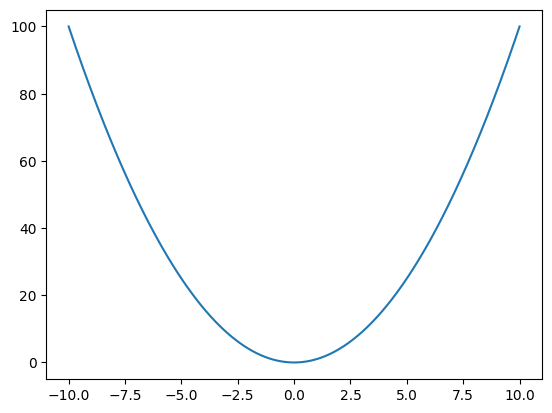

In [ ]:
plot_function(lambda x: x**2)

In [ ]:
def derivative(f, x):
    delta_x = 0.00001
    return (f(x+delta_x) - f(x))/delta_x

In [ ]:
derivative(lambda x: x**2, 1)

2.00001000001393

In [ ]:
derivative(lambda x: x**2, -3)

-5.999990000127297

In [ ]:
def plot_derivative(func):
  x_values = np.linspace(-10, 10, 1000)
  # delta has to be close to 0, but cannot be 0, that would give division by 0
  delta = 0.0001

  y_values = (func(x_values + delta) - func(x_values)) / delta

  plt.plot(x_values, y_values)

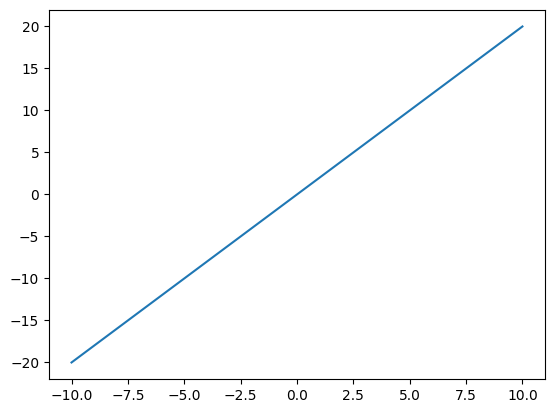

In [ ]:
plot_derivative(lambda x: x**2)

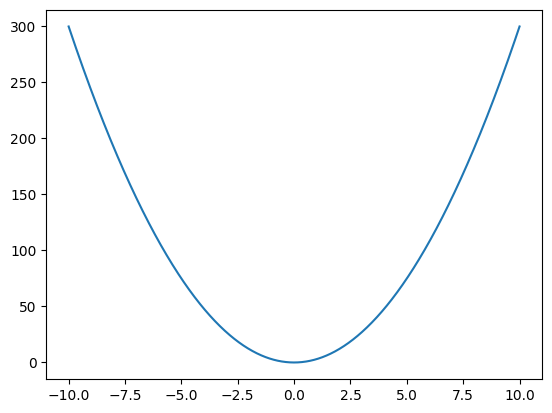

In [ ]:
plot_derivative(lambda x: x**3)

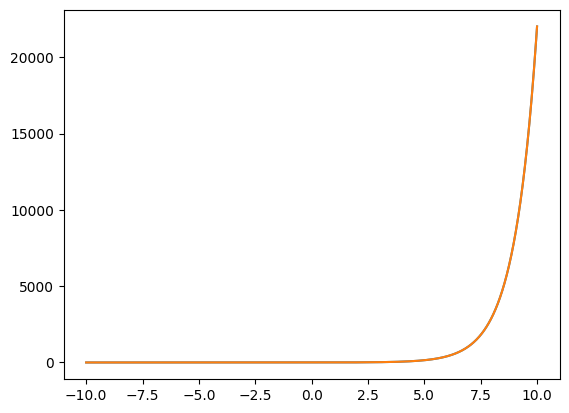

In [ ]:
plot_function(lambda x: np.exp(x))
plot_derivative(lambda x: np.exp(x))

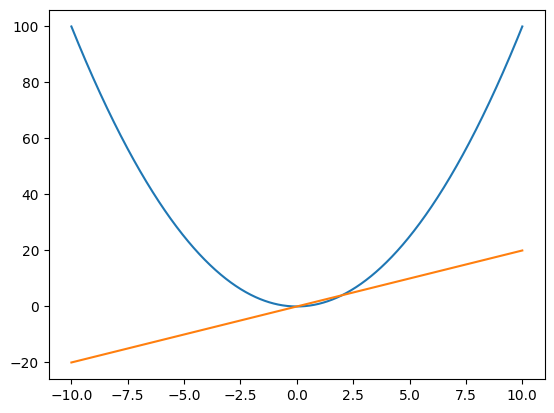

In [ ]:
plot_function(lambda x: x**2)
plot_derivative(lambda x: x**2)

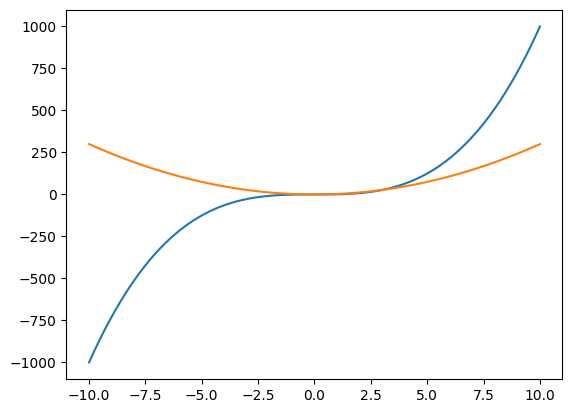

In [ ]:
plot_function(lambda x: x**3)
plot_derivative(lambda x: x**3)

# Partial Derivatives

In [ ]:
def get_partials(f, x, y):
    delta = 0.0001

    dfx = (f(x+delta, y) - f(x, y)) / delta
    dfy = (f(x, y+delta) - f(x, y)) / delta

    return dfx, dfy

In [ ]:
get_partials(lambda x, y: x**2 + y**2, 3, 4)

(6.000099999994291, 8.00009999998963)

In [ ]:
#creating a 2D grid
def get_grid(axis_lim):
    x= np.linspace(-axis_lim,axis_lim,20)
    y= np.linspace(-axis_lim,axis_lim,20)
    g1,g2 = np.meshgrid(x,y)
    return g1,g2

In [ ]:
axis_lim = 10
g1, g2 = get_grid(axis_lim)


In [ ]:
#getting gradients for all the points in the 2d grid defined above
def get_partials_from_grid(func,g1,g2):
    U = np.zeros(g1.shape) # df/dx
    V = np.zeros(g2.shape) # df/dy
    for rows_id,(row_x,row_y) in enumerate(zip(g1,g2)):
        for col_id,(x,y) in enumerate(zip(row_x,row_y)):
            fx,fy = get_partials(func, x, y)
            U[rows_id,col_id] = fx
            V[rows_id,col_id] = fy
    return U,V

In [ ]:
def plot_gradients(g1,g2,U,V):
    fig,ax=plt.subplots()
    q=ax.quiver(g1,g2,U,V)
    plt.show()


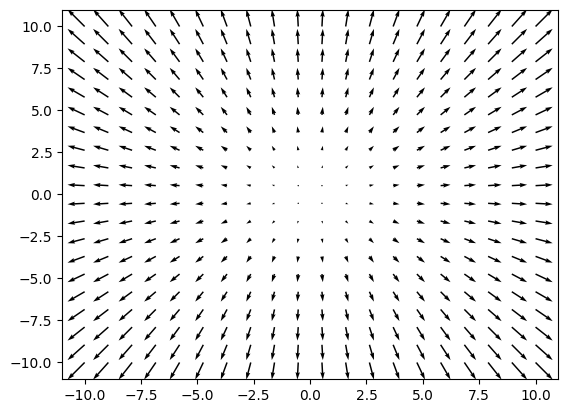

In [ ]:
func = lambda x,y : x**2 + y**2
axis_lim = 10
g1,g2 = get_grid(axis_lim)
U,V = get_partials_from_grid(func,g1,g2)
plot_gradients(g1,g2,U,V)

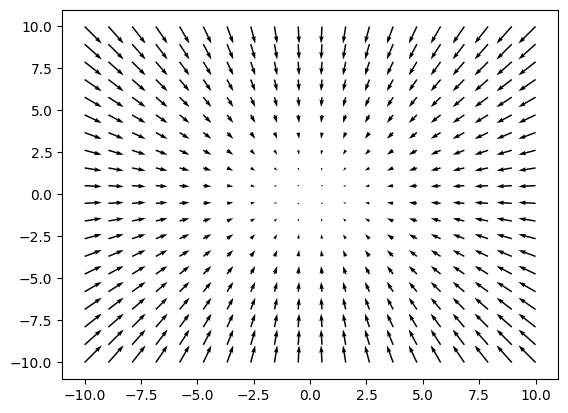

In [ ]:
func = lambda x,y : x**2 + y**2
axis_lim = 10
g1,g2 = get_grid(axis_lim)
U,V = get_partials_from_grid(func,g1,g2)
plot_gradients(g1,g2,-U,-V)

In [ ]:
# f = (x-5)**2

learning_rate = 0.1

x = 8


dx = derivative(lambda x: (x-5)**2, x)

x = x - learning_rate*dx
print(x)

7.399999000022632


In [ ]:
dx = derivative(lambda x: (x-5)**2, x)
x = x - learning_rate*dx
print(x)

6.919998200035408


In [ ]:
dx = derivative(lambda x: (x-5)**2, x)
x = x - learning_rate*dx
print(x)

6.535997560042965


In [ ]:
dx = derivative(lambda x: (x-5)**2, x)
x = x - learning_rate*dx
print(x)

6.228797048049898


In [ ]:
dx = derivative(lambda x: (x-5)**2, x)
x = x - learning_rate*dx
print(x)

5.983036638449228


In [ ]:
# f = (x-5)**2

learning_rate = 0.1

x = 8

for i in range(100):
    # gradients
    dx = derivative(lambda x: (x-5)**2, x)

    x = x - learning_rate*dx

print(x)

4.999995000611112


In [ ]:
# f = (x-5)**2

learning_rate = 0.1

x = -3

for i in range(100):
    # gradients
    dx = derivative(lambda x: (x-5)**2, x)

    x = x - learning_rate*dx

print(x)

4.999994998370372


In [ ]:
get_partials(lambda x, y: 2*x**2 + 4*x*y, 3, 4)

(28.0002000000934, 11.999999999972033)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

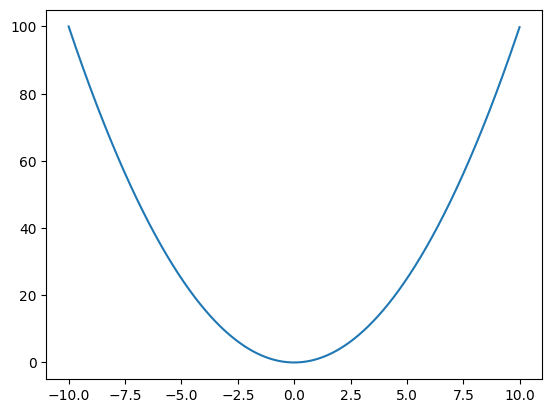

In [ ]:
## Try changing this
def f(x):
  return x**2

## Plot f(x)
x = np.arange(-10, 10, 0.01)
y = f(x)

plt.figure()
plt.plot(x, y)
plt.show()


In [ ]:
# This function takes derivative of f at point x
def derivative(x, f):
  delta = 0.0001
  return (f(x + delta) - f(x)) / delta

# This function does exactly one update to my parameter x
def one_step_gd(x, f, lr): # lr -> learning rate, same as \eta
  grad = derivative(x, f)
  new_x = x - lr * grad
  new_fx = f(new_x)
  return new_x, new_fx, grad

In [ ]:
## Define the initial random guess
x0 = -8
num_steps = 0 # Same as t in the update equation

# Let us save all our steps.
xs = []
fxs = []
grads = []


-0.549802377914514


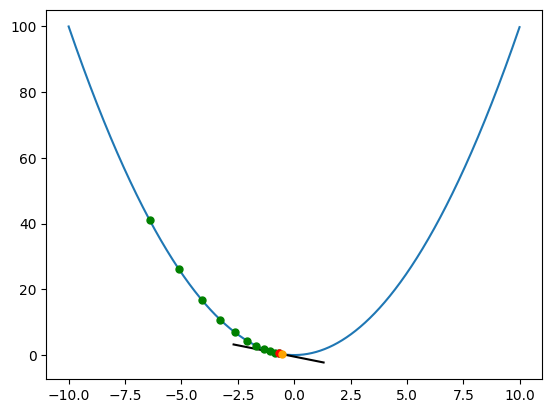

In [ ]:

## Lets plot!!
plt.figure()

# First, plot the function
x = np.arange(-10, 10, 0.01)
y = f(x)
plt.plot(x, y)

# Now apply gradient descent
new_x, new_fx, grad = one_step_gd(x0, f, 0.1)
xs.append(new_x)
fxs.append(new_fx)
grads.append(grad)
num_steps += 1

# Next, plot the old guess and the gradient at that point
t_c = f(x0) - grads[-1] * x0
delta = 2.
t_x = np.arange(x0 - delta, x0 + delta, 0.01)
t_y = grads[-1] * t_x + t_c
plt.plot(t_x, t_y, color="black")

# Next, plot the other guesses
for i in range(num_steps-1):
    plt.plot(xs[i], fxs[i], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")

plt.plot(x0, f(x0), marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
plt.plot(xs[-1], fxs[-1], marker="o", markersize=5, markeredgecolor="orange", markerfacecolor="orange")

print(new_x)
x0 = new_x
plt.show()


In [ ]:
def grad(X, w, w0):

    return None

In [ ]:
w = np.random.rand(2)
w0 = np.random.random()
lamda = np.random.random()
lr = 0.1

for i in range(100):
    w = w - lr * dw
    w0 = w0 - lr * dw0
    lamda = lamda - lr * dlamda


# print(w, w0)